In [1]:
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data as wb
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading stock info of Microsoft and Apple since start of 2018 
MSFT = wb.DataReader('MSFT', data_source='yahoo', start='2018-1-3')
AAPL = wb.DataReader('AAPL', data_source='yahoo', start='2018-1-3')

In [3]:
# Calculating simple returns at close of each stock by taking the natural log of the current close over the previous
MSFT['simple_returns'] = np.log(MSFT['Close'] / MSFT['Close'].shift(1))
AAPL['simple_returns'] = np.log(AAPL['Close'] / AAPL['Close'].shift(1))

<AxesSubplot:xlabel='Date'>

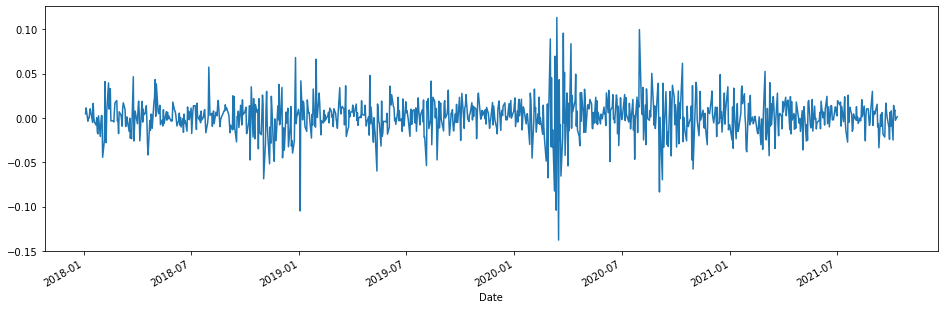

In [4]:
# Plotting returns for AAPL stocks since 2018
AAPL['simple_returns'].plot(figsize=(16,5))

In [5]:
# Combining these results to analyze covariance and correlation
returns = pd.concat([MSFT['simple_returns'],AAPL['simple_returns']], axis=1, keys=['MSFT', 'AAPL'])

In [6]:
# Calculating Covariance
cov_returns = returns.cov()*250
cov_returns 
# Results show strong covariance (close to 1), signalling both stocks move in the same direction; if MSFT goes up
# we can reasonably expect AAPL to go up, in spite of being competitors. To see how closely we look at correlation

,MSFT,AAPL
MSFT,0.090984,0.076722
AAPL,0.076722,0.110605


In [7]:
# Calculating Correlation
corr = returns.corr()
corr 
# Results show strong positive correlation between MSFT and AAPL stocks, not only suggesting their performances are 
# based similar underlying factors but also that they move at similar rates

,MSFT,AAPL
MSFT,1.000000,0.764804
AAPL,0.764804,1.000000


In [ ]:
# Unfortunately, this suggests (to little surprise) that the performances of these stocks closely follow each other, 
# indicating that they do little to diversify each other and hedge against risk. 